In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.libqsturng import psturng, qsturng
from sklearn.linear_model import LinearRegression


def std_sample_mean(s_population, n):
    """For a sample of size n, calculate the standard deviation of the sample mean,
    given the standard deviation of the population.
    """
    return s_population / np.sqrt(n)


def ci(mean, std, confidence):
    '''Calculate the confidence interval for the specified normal distribution of N(mean, std)
    at given two-sided confidence level.
    '''
    two_sided_confidence = confidence + (1 - confidence) / 2
    std_error = st.norm.ppf(two_sided_confidence)
    return mean - std_error * std, mean + std_error * std


def ci_t(mean, std, df, confidence):
    '''Calculate the confidence interval for the specified t distribution of N(mean, std)
    at given two-sided confidence level.
    '''
    two_sided_confidence = confidence + (1 - confidence) / 2
    std_error = st.t.ppf(two_sided_confidence, df)
    return mean - std_error * std, mean + std_error * std


def r2(t, df):
    """Return the coefficient of determination given the t-statistic of a t-test and the
    degrees of freedom df.
    """
    return t**2 / (t**2 + df)


def t_statistic(r, N):
    """Calculate the t statistic for the specified Pearson's correlation coefficient r and sample size N."""
    degrees_of_freedom = N - 2
    t = r * np.sqrt(degrees_of_freedom / (1 - r**2))
    return t


def p_value(r, N):
    """Calculate the p value for the specified Pearson's correlation coefficient r, sample size N and
    two-tailed confidence = 0.95."""
    degrees_of_freedom = N - 2
    t = abs(t_statistic(r, N))
    return (1 - st.t.cdf(t, degrees_of_freedom)) * 2


# Lesson 20 - X<sup>2</sup> test

## `scipy.stats.chisquare`

```
Signature: st.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
Docstring:
Calculate a one-way chi-square test.

The chi-square test tests the null hypothesis that the categorical data
has the given frequencies.

Parameters
----------
f_obs : array_like
    Observed frequencies in each category.
f_exp : array_like, optional
    Expected frequencies in each category.  By default the categories are
    assumed to be equally likely.
ddof : int, optional
    "Delta degrees of freedom": adjustment to the degrees of freedom
    for the p-value.  The p-value is computed using a chi-squared
    distribution with ``k - 1 - ddof`` degrees of freedom, where `k`
    is the number of observed frequencies.  The default value of `ddof`
    is 0.
axis : int or None, optional
    The axis of the broadcast result of `f_obs` and `f_exp` along which to
    apply the test.  If axis is None, all values in `f_obs` are treated
    as a single data set.  Default is 0.

Returns
-------
chisq : float or ndarray
    The chi-squared test statistic.  The value is a float if `axis` is
    None or `f_obs` and `f_exp` are 1-D.
p : float or ndarray
    The p-value of the test.  The value is a float if `ddof` and the
    return value `chisq` are scalars.

See Also
--------
scipy.stats.power_divergence

Notes
-----
This test is invalid when the observed or expected frequencies in each
category are too small.  A typical rule is that all of the observed
and expected frequencies should be at least 5.

The default degrees of freedom, k-1, are for the case when no parameters
of the distribution are estimated. If p parameters are estimated by
efficient maximum likelihood then the correct degrees of freedom are
k-1-p. If the parameters are estimated in a different way, then the
dof can be between k-1-p and k-1. However, it is also possible that
the asymptotic distribution is not chi-square, in which case this test
is not appropriate.
```

In [9]:
observed_frequencies = np.array([16, 18, 16, 14, 12, 12])
expected_frequencies = np.array([16, 16, 16, 16, 16, 8])

st.chisquare(observed_frequencies, expected_frequencies)

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)

## `scipy.stats.chi2`

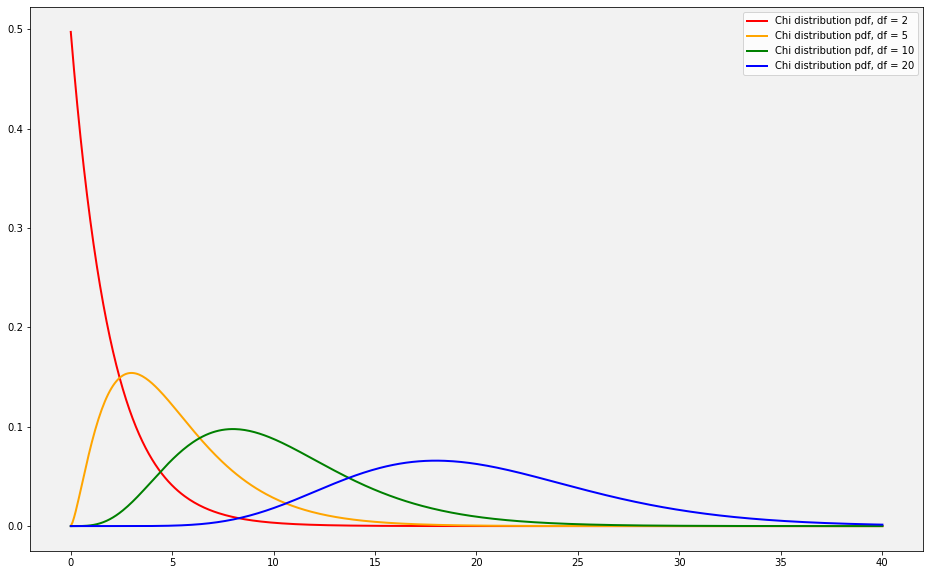

In [16]:
fig = plt.figure(figsize=(16, 10))

ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('0.95')  # set background color to light grey

x = np.linspace(0.01, 40, 500)

# df: degrees of freedom, different categories in the observed frequencies minus one

df = 2
ax.plot(x, st.chi2.pdf(x, df), 'red', lw=2, label='Chi distribution pdf, df = {}'.format(df))

df = 5
ax.plot(x, st.chi2.pdf(x, df), 'orange', lw=2, label='Chi distribution pdf, df = {}'.format(df))

df = 10
ax.plot(x, st.chi2.pdf(x, df), 'green', lw=2, label='Chi distribution pdf, df = {}'.format(df))

df = 20
ax.plot(x, st.chi2.pdf(x, df), 'blue', lw=2, label='Chi distribution pdf, df = {}'.format(df))

plt.legend()
plt.show()

## X<sup>2</sup> test for goodness of fit

In [24]:
obs = [41, 59]
exp = [33, 67]
df = 1  # number of categories - 1

statistic, p = st.chisquare(obs, exp)

print("Chi-square statistic = {:.3f}, p-value = {:.3f}".format(statistic, p))

Chi-square statistic = 2.895, p-value = 0.089


In [26]:
p = 1 - st.chi2.cdf(statistic, df)

print("p-value: {:.3f}".format(p))

p-value: 0.089


In [27]:
t = st.chi2.ppf(.95, df)

print("t critical value at .95 confidence: {:.3f}". format(t))

t critical value at .95 confidence: 3.841


In [28]:
t = st.chi2.ppf(.99, 1)

print("t critical value at .95 confidence: {:.3f}". format(t))

t critical value at .95 confidence: 6.635


## X<sup>2</sup> test for independence

### See [Chi-squared test, Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test#Example_chi-squared_test_for_categorical_data)

In [35]:
observed = pd.DataFrame({'hit': [7, 43], 'smashed': [16, 34], 'control': [6, 44]}, index=['Yes', 'No'])

observed

,hit,smashed,control
Yes,7,16,6
No,43,34,44


In [52]:
expected = pd.DataFrame({'hit': [9.666, 40.333], 'smashed': [9.666, 40.333], 'control': [9.666, 40.333]}, index=['Yes', 'No'])

expected

,hit,smashed,control
Yes,9.666,9.666,9.666
No,40.333,40.333,40.333


In [53]:
rows, cols = observed.shape
df = (rows - 1) * (cols - 1)

In [54]:
obs = observed.values.reshape(1, -1).flatten()
exp = expected.values.reshape(1, -1).flatten()
print(obs)
print(exp)

[ 7 16  6 43 34 44]
[ 9.666  9.666  9.666 40.333 40.333 40.333]


In [60]:
statistic, p = st.chisquare(obs, exp, ddof=4)

print("Chi-square statistic = {:.3f}, p-value = {:.3f}".format(statistic, p))

Chi-square statistic = 7.780, p-value = 0.005


In [61]:
t = st.chi2.ppf(.95, df)

print("t critical value at .95 confidence: {:.3f}". format(t))

t critical value at .95 confidence: 5.991


### See [Cramér's V, Wikipedia](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

In [62]:
n = 150
k = 2

v = np.sqrt(statistic / (n * (k - 1)))

print("Cramer's V = {:.3f}".format(v))

Cramer's V = 0.228


# Problem Set 16

## Problem 1

In [70]:
obs = np.array([8, 4, 1, 8, 3, 0])

exp = np.zeros(6) + obs.sum() / len(obs)

df = len(obs) - 1  # number of categories - 1

statistic, p = st.chisquare(obs, exp)

print("Chi-square statistic = {:.3f}, p-value = {:.3f}".format(statistic, p))

Chi-square statistic = 14.500, p-value = 0.013


In [67]:
t = st.chi2.ppf(.95, df)

print("t critical value at .95 confidence: {:.3f}". format(t))

t critical value at .95 confidence: 11.070


## Problem 2

In [86]:
observed = pd.DataFrame({'cabin': [299, 280], 'steerage': [186, 526]}, index=['Yes', 'No'])

observed

,cabin,steerage
Yes,299,186
No,280,526


In [87]:
total = observed.values.sum()
print("Total observations = {}".format(total))

Total observations = 1291


In [89]:
expected = observed.copy()

total_yes = observed.loc['Yes'].sum()
total_no = observed.loc['No'].sum()
total_cabin = observed['cabin'].sum()
total_steerage = observed['steerage'].sum()

expected.loc['Yes']['cabin'] = total_yes * total_cabin
expected.loc['Yes']['steerage'] = total_yes * total_steerage
expected.loc['No']['cabin'] = total_no * total_cabin
expected.loc['No']['steerage'] = total_no * total_steerage

expected = expected / total
expected

,cabin,steerage
Yes,217.517428,267.482572
No,361.482572,444.517428


In [95]:
rows, cols = observed.shape
df = (rows - 1) * (cols - 1)

In [96]:
t = st.chi2.ppf(.95, df)

print("t critical value at .95 confidence: {:.3f}". format(t))

t critical value at .95 confidence: 3.841


In [97]:
obs = observed.values.reshape(1, -1).flatten()
exp = expected.values.reshape(1, -1).flatten()
print(obs)
print(exp)

[299 186 280 526]
[217.51742835 267.48257165 361.48257165 444.51742835]


In [105]:
statistic, p = st.chisquare(obs, exp, ddof=2)

print("Chi-square statistic = {:.3f}, p-value = {:.3f}".format(statistic, p))

Chi-square statistic = 88.649, p-value = 0.000
